In [162]:
import random
import math

from IPython.core.display_functions import display
import pandas as pd
from numpy import float64

RESULT_PATH = "практика 1/result.csv"

# Задание 1. Нахождение числа $\Pi$ методом Монте Карло

In [131]:
def calc_pi(x_0, y_0, r_0, exp_nmb):
    m = 0
    for i in range(exp_nmb):
        xp = random.uniform(-r_0, r_0)
        yp = random.uniform(-r_0, r_0)
        if (xp + x_0) ** 2 + (yp + y_0) ** 2 < r_0 ** 2:
            m += 1
    pi = 4 * m / exp_nmb
    return pi

# Задание 2. Серии вычислений

In [132]:
EXP_NUMBS = [10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7, 10 ** 8]
SER_NAMES = ["SERIA_1", "SERIA_2", "SERIA_3", "SERIA_4", "SERIA_5"]

In [133]:
def calculation():
    ser = pd.Series(dtype=float64, index=EXP_NUMBS)
    for exp_nmb in EXP_NUMBS:
        pi = calc_pi(0, 0, 1, exp_nmb)
        ser.at[exp_nmb] = pi
    # display(ser)
    return ser


def series_of_calculation():
    df = pd.DataFrame(index=EXP_NUMBS)
    for ser_name in SER_NAMES:
        ser = calculation()
        df[ser_name] = ser
    return df


def save_result():
    df = series_of_calculation()
    display(df)
    df.to_csv(RESULT_PATH, mode="w+") # overwrite file mode

In [134]:
save_result()

,SERIA_1,SERIA_2,SERIA_3,SERIA_4,SERIA_5
10000,3.107600,3.135200,3.137600,3.147600,3.139600
100000,3.145920,3.141520,3.141320,3.135920,3.130320
1000000,3.141508,3.143296,3.141956,3.140272,3.143748
10000000,3.142140,3.142452,3.142016,3.141128,3.141762
100000000,3.141472,3.141633,3.141414,3.141582,3.141907


# Задание 3.

In [183]:
def calculate_std(path):
    df = pd.read_csv(path)

    stds = pd.Series(dtype=float64)
    for seria_name, seria_data in df[SER_NAMES].iteritems():
        stds.at[seria_name] = seria_data.std()
    print("Погрешность вычислений значений числа для каждой серии экспериментов")
    display(stds)

    means = pd.Series(dtype=float64)
    for seria_name, seria_data in df[SER_NAMES].iteritems():
        means.at[seria_name] = seria_data.mean()
    print("Средний результат для каждой серии:")
    display(means)
    print("Погрешность для усредненных значений:", means.std())


calculate_std(RESULT_PATH)

Погрешность вычислений значений числа для каждой серии экспериментов


SERIA_1    0.015832
SERIA_2    0.003222
SERIA_3    0.001850
SERIA_4    0.004177
SERIA_5    0.005321
dtype: float64

Средний результат для каждой серии:


SERIA_1    3.135728
SERIA_2    3.140820
SERIA_3    3.140861
SERIA_4    3.141300
SERIA_5    3.139467
dtype: float64

Погрешность для усредненных значений: 0.0022898452550936727


# Задание 4. Задача нахождения определенного интеграла

Найти значения определенного интеграла функции $f(x)=x^3+1$ на интервале $(0;\,2)$. Провести три серии расчетов для числа экспериментов $ExpNmb=10^4,\,10^5,\,10^6,\,10^7$.

In [179]:
TASK_4_EXP_NUMBS = [10 ** 4, 10 ** 5, 10 ** 6, 10 ** 7]
TASK_4_SER_NAMES = ["SERIA_1", "SERIA_2", "SERIA_3", "SERIA_4"]
FUNCTION = lambda x: x ** 3 + 1
X_MIN = 0
X_MAX = 2
Y_MIN = 0
Y_MAX = 10

TASK_4_RESULT_PATH = "практика 1/task 4 result.csv"

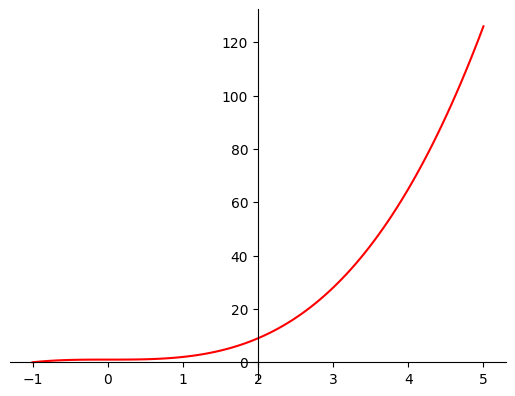

In [180]:
def task_4_draw_function(func):
    import matplotlib.pyplot as plt
    import numpy as np

    x = np.linspace(-1,5,100)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x, func(x), 'r')

    # show the plot
    plt.show()

task_4_draw_function(FUNCTION)


In [182]:
def task_4_calc_function(func, exp_nmb):

    m = 0
    s_par = abs((Y_MAX - Y_MIN) * (X_MAX - X_MIN))
    for i in range(exp_nmb):
        xp = random.uniform(X_MIN, X_MAX)
        yp = random.uniform(Y_MIN, Y_MAX)
        if func(xp) > yp:
            m += 1
    s = s_par * m / exp_nmb
    return s


def task_4_calculation():
    ser = pd.Series(dtype=float64, index=TASK_4_EXP_NUMBS)
    for exp_nmb in TASK_4_EXP_NUMBS:
        s = task_4_calc_function(FUNCTION, exp_nmb)
        ser.at[exp_nmb] = s
    display(ser)
    return ser


def task_4_series_of_calculation():
    df = pd.DataFrame(index=TASK_4_EXP_NUMBS)
    for ser_name in SER_NAMES:
        ser = task_4_calculation()
        df[ser_name] = ser
    return df


def task_4_save_result():
    df = task_4_series_of_calculation()
    df.to_csv(TASK_4_RESULT_PATH, mode="w+") # overwrite file mode

task_4_save_result()

10000       5.946000
100000      5.993400
1000000     6.011720
10000000    5.998252
dtype: float64

10000       6.016000
100000      5.974000
1000000     5.989900
10000000    6.002152
dtype: float64

10000       5.968000
100000      5.965800
1000000     6.010780
10000000    5.995488
dtype: float64

10000       5.812000
100000      5.925800
1000000     5.991820
10000000    5.996378
dtype: float64

10000       5.852000
100000      6.015400
1000000     5.991480
10000000    6.002566
dtype: float64

In [184]:
calculate_std(TASK_4_RESULT_PATH)

Погрешность вычислений значений числа для каждой серии экспериментов


SERIA_1    0.028631
SERIA_2    0.017871
SERIA_3    0.021850
SERIA_4    0.085946
SERIA_5    0.076204
dtype: float64

Средний результат для каждой серии:


SERIA_1    5.987343
SERIA_2    5.995513
SERIA_3    5.985017
SERIA_4    5.931500
SERIA_5    5.965362
dtype: float64

Погрешность для усредненных значений: 0.0256787321450065
